# Predictive Modeling Example

## Step 1: Import a number of libraries that we expect to use

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


np.random.seed(1) # set this to ensure the results are repeatable. 

# this is a notebook 'MAGIC' that will allow for creation of inline plots (this is the defaul, so often not necessary)
%matplotlib inline

## Step 2: Load the given data that we will model

In [16]:
df = pd.read_csv('c02_dataset_4_noise.csv')

df.head(10)

,X,y
0,4.90,38.74500
1,2.39,59.50315
2,-4.48,212.66560
3,-6.11,322.16315
4,-20.30,653.73500
5,6.08,4.17960
6,-3.54,145.74740
7,1.53,-149.80365
8,5.01,98.94515
9,-7.86,424.15940


Seperate out the input m(X) and the target (y)

In [17]:
X = df[['X']]
y = df[['y']]

## Step 3: Explore the given data

Explore the data using a scatterplot.

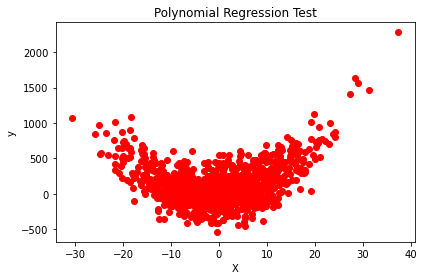

In [18]:
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(X, y, color='red')

ax.set_xlabel('X')
ax.set_ylabel('y')
ax.set_title("Polynomial Regression Test")
plt.tight_layout()
plt.show()

## Step 4: Fit the model

Fit the linear regression model to the dataset

In [19]:
lin_reg1=LinearRegression().fit(X,y)

## Step 5: Analyze the resulting model's performance

Visualize the linear regression model results

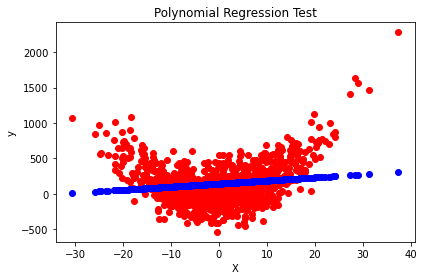

In [20]:
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(X, y, color='red')
ax.scatter(X,lin_reg1.predict(X),color='blue')

ax.set_xlabel('X')
ax.set_ylabel('y')
ax.set_title("Polynomial Regression Test")
plt.tight_layout()
plt.show()

In [21]:
b0 = lin_reg1.intercept_[0]
b1 = lin_reg1.coef_[0][0]
r2 = lin_reg1.score(X, y)

In [22]:
print(f"Y = {b0} + {b1}x")
print(f"R^2: {r2}")

Y = 143.58932955846552 + 4.374561501016898x
R^2: 0.02225367272362211


... using fstring formatting, we can display these values as follows...

In [23]:
print(f"Y = {b0:.2f} + {b1:.2f}x")
print(f"R^2: {r2:.3f}") 
# for more on fstrings see here https://www.freecodecamp.org/news/python-f-strings-tutorial-how-to-use-f-strings-for-string-formatting/

Y = 143.59 + 4.37x
R^2: 0.022


## Step 6: Try another model (in this case, a second order polynomial)

Create the features (that is, x and x^2) for the linear regression. Then do all the analysis we did above again.

In [24]:
X_poly=PolynomialFeatures(degree=2).fit_transform(X)

Fit this model to the polynomial features...

In [25]:
lin_reg2=LinearRegression().fit(X_poly,y)

Explore the results visually...

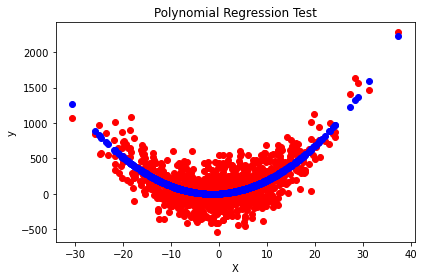

In [26]:
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(X, y, color='red')
ax.scatter(X,lin_reg2.predict(X_poly),color='blue')

ax.set_xlabel('X')
ax.set_ylabel('y')
ax.set_title("Polynomial Regression Test")
plt.tight_layout()
plt.show()

Look at what the 'hidden model' is that we have identified...

In [27]:
print(f"Y = {lin_reg2.intercept_[0]:.2f} + {lin_reg2.coef_[0][1]:.2f}x + {lin_reg2.coef_[0][2]:.2f}x^2")
print(f"R^2: {lin_reg2.score(X_poly, y):.2f}")

Y = 3.46 + 4.16x + 1.48x^2
R^2: 0.50


the values of the r2 values has decreased from 0.83 to 0.50. we have increased the noise by change the std from 100 to 200.